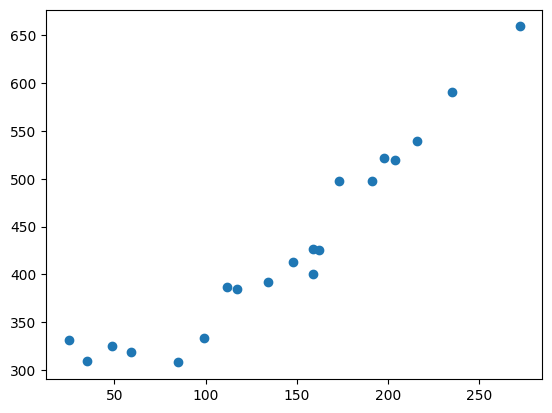

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读入训练数据
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

# 绘图
plt.plot(train_x, train_y, 'o')
plt.show()

$$
f_\theta(x) = \theta_0 + \theta_1x \\
E_{\theta} = \frac{1}{2} \sum_{i=1}^{n} (f_\theta(x^{(i)})-y^{(i)})^2

$$

In [2]:
# 参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 预测函数
def f(x):
    return theta0 + theta1 * x

# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [3]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

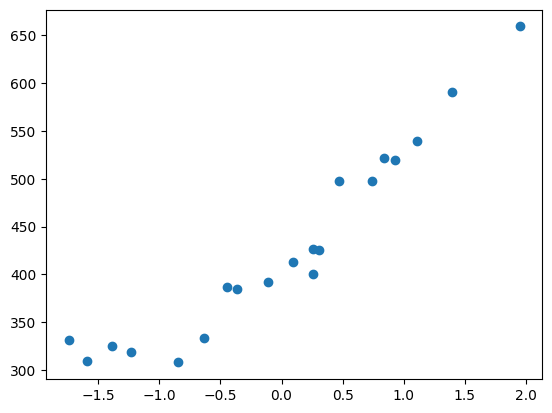

In [4]:
plt.plot(train_z, train_y, 'o')
plt.show()

$$
\begin{align}
\theta_{next\_0} := \theta_{0} - \eta \sum_{i=1}^{n}(f_{\theta}(x_i)-y_i)\\
\theta_{next\_1} := \theta_{1} - \eta \sum_{i=1}^{n}(f_{\theta}(x_i)-y_i)x_i\\
\end{align}
$$

In [5]:
# 学习率
ETA = 1e-3

# 误差的差值
diff = 1

# 更新次数
count = 0

# 重复学习
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新结果保存到临时变量
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # 更新参数
    theta0 = tmp0
    theta1 = tmp1
    
    # 计算与上次误差的差值
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # 输出日志
    count += 1
    log = '第{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


第1次: theta0 = 9.480, theta1 = 2.642, 差值 = 76022.6034
第2次: theta0 = 17.874, theta1 = 4.459, 差值 = 73012.1083
第3次: theta0 = 26.099, theta1 = 6.239, 差值 = 70120.8288
第4次: theta0 = 34.160, theta1 = 7.984, 差值 = 67344.0440
第5次: theta0 = 42.060, theta1 = 9.694, 差值 = 64677.2198
第6次: theta0 = 49.802, theta1 = 11.369, 差值 = 62116.0019
第7次: theta0 = 57.389, theta1 = 13.012, 差值 = 59656.2083
第8次: theta0 = 64.824, theta1 = 14.621, 差值 = 57293.8224
第9次: theta0 = 72.111, theta1 = 16.198, 差值 = 55024.9870
第10次: theta0 = 79.251, theta1 = 17.744, 差值 = 52845.9976
第11次: theta0 = 86.249, theta1 = 19.258, 差值 = 50753.2960
第12次: theta0 = 93.107, theta1 = 20.743, 差值 = 48743.4655
第13次: theta0 = 99.828, theta1 = 22.198, 差值 = 46813.2243
第14次: theta0 = 106.415, theta1 = 23.623, 差值 = 44959.4206
第15次: theta0 = 112.869, theta1 = 25.020, 差值 = 43179.0276
第16次: theta0 = 119.195, theta1 = 26.389, 差值 = 41469.1381
第17次: theta0 = 125.394, theta1 = 27.731, 差值 = 39826.9602
第18次: theta0 = 131.469, theta1 = 29.046, 差值 = 38249.8126
第1

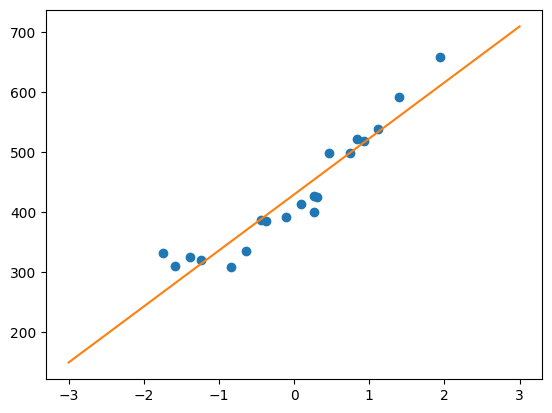

In [6]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

In [ ]:
# 验证
f(standardize(100))

np.float64(649.9727338765522)

In [ ]:
f(standardize(200))

np.float64(510.4700361543177)

In [12]:
f(standardize(300))

np.float64(649.9727338765522)